In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import wget
import requests

### Load data

In [2]:
df = pd.read_csv("../data/tesla.csv")
df = df[1:]
df = df.iloc[::-1]
df.reset_index(inplace=True)
del df["index"]
df["date"] = pd.to_datetime(df["date"])

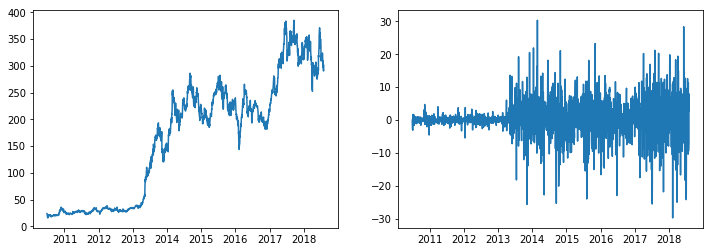

In [3]:
plt.figure(figsize=(12,4))
ax1 = plt.subplot(1,2,1)
ax1.plot(df["date"], df["close"])
ax2 = plt.subplot(1,2,2)
ax2.plot(df["date"], df["close"].diff())

In [65]:
#df.to_csv("../code/data/tesla.csv", index=False)

#### Daily changes

In [14]:
#df = pd.read_csv("../code/data/tesla_latest.csv")
df = pd.read_csv("../code/data/tesla.csv")
del df["change"]
df.head(2)

,date,close,volume,open,high,low
0,2010-06-30,23.83,17165210.0,25.79,30.4192,23.30
1,2010-07-01,21.96,8216789.0,25.00,25.9200,20.27


In [32]:
dfc = df.copy()

dfc["date"] = pd.to_datetime(dfc["date"])
dfc.sort_values("date", inplace=True)
dfc["year"] = dfc.apply(lambda x: x["date"].year, axis=1)
dfc = dfc[dfc["year"] >= 2014]
dfc["weekday"] = dfc.apply(lambda x: x["date"].weekday(), axis=1)

#dfc = dfc[::7]
dfc = dfc[dfc["weekday"]==4]

dfc.reset_index(inplace=True)
del dfc["index"]
for i in range(len(dfc)):
    if i != 0:
        current_price = dfc.iloc[i]["close"]
        previous_price = dfc.iloc[i-1]["close"]
        dfc.at[i, "change"] = (current_price - previous_price) / previous_price
dfc = dfc[1:]
#dfc["change"] = (dfc["close"] - dfc["open"]) / dfc["open"]
minChange = dfc["change"].min()
maxChange = dfc["change"].max()
dfc["nChange"] = (dfc["change"] - minChange) / (maxChange - minChange)
dfc.to_csv("../code/data/tesla_change_weekly_weekday4.csv", index=False)
dfc

,date,close,volume,open,high,low,year,weekday,change,nChange
1,2014-01-10,145.7199,7445861.0,148.460,148.9000,142.2500,2014,4,-0.025676,0.390170
2,2014-01-17,170.0100,9205616.0,170.190,173.2000,167.9500,2014,4,0.166690,0.995918
3,2014-01-24,174.6000,7684134.0,177.850,180.4800,173.5310,2014,4,0.026998,0.556038
4,2014-01-31,181.4100,6507957.0,178.850,186.0000,178.5146,2014,4,0.039003,0.593841
5,2014-02-07,186.5300,8951247.0,181.010,186.6300,179.6000,2014,4,0.028223,0.559895
6,2014-02-14,198.2300,6164371.0,198.100,201.8800,197.0000,2014,4,0.062724,0.668537
7,2014-02-21,209.6000,7817352.0,211.640,213.9800,209.1900,2014,4,0.057358,0.651637
8,2014-02-28,244.8100,14585150.0,249.650,252.6800,242.5500,2014,4,0.167987,1.000000
9,2014-03-07,246.2100,7806564.0,252.940,254.8500,244.4100,2014,4,0.005719,0.489030
10,2014-03-14,230.9700,8254035.0,235.290,236.9365,228.3200,2014,4,-0.061898,0.276108


(array([ 1.,  1.,  6., 17., 56., 63., 45., 16.,  7.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

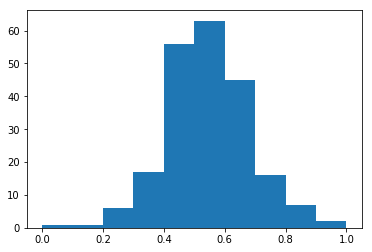

In [26]:
plt.hist(dfc["nChange"]) #weekday0

In [27]:
dfc.sort_values("nChange", ascending=False)

,date,close,volume,open,high,low,year,weekday,change,nChange
2,2014-01-27,169.62,8714715.0,175.160,177.9200,164.7100,2014,0,0.217310,1.000000
101,2016-02-22,177.74,5055340.0,170.120,178.9100,169.8500,2016,0,0.201027,0.965047
6,2014-03-03,250.56,13083260.0,237.260,251.6500,234.9900,2014,0,0.151206,0.858104
199,2018-04-09,289.66,10241410.0,300.370,309.5000,289.2100,2018,0,0.147259,0.849632
142,2017-01-09,231.28,3972716.0,228.970,231.9200,228.0000,2017,0,0.140828,0.835826
79,2015-08-31,249.06,4688373.0,245.620,254.9500,245.5100,2015,0,0.137936,0.829619
119,2016-07-11,224.78,5369066.0,219.960,226.7800,219.5100,2016,0,0.132108,0.817108
193,2018-02-26,357.42,4334500.0,353.500,359.0000,352.3550,2018,0,0.132043,0.816970
62,2015-04-27,231.55,11659100.0,222.560,238.7500,222.0000,2015,0,0.128027,0.808348
207,2018-06-11,332.10,13166050.0,322.510,334.6600,322.5000,2018,0,0.119162,0.789319


(array([ 3.,  9., 25., 31., 57., 39., 46.,  9.,  6.,  4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

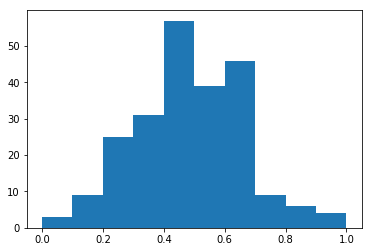

In [29]:
plt.hist(dfc["nChange"]) #weekday4

In [30]:
dfc.sort_values("nChange", ascending=False)

,date,close,volume,open,high,low,year,weekday,change,nChange
8,2014-02-28,244.81,14585150.0,249.650,252.6800,242.5500,2014,4,0.167987,1.000000
2,2014-01-17,170.01,9205616.0,170.190,173.2000,167.9500,2014,4,0.166690,0.995918
106,2016-02-26,190.34,6054061.0,188.700,192.0000,185.0000,2016,4,0.142634,0.920167
63,2015-04-10,210.90,4020850.0,209.850,211.6500,209.0000,2015,4,0.140000,0.911872
223,2018-06-15,358.17,10827560.0,353.840,364.6700,351.2500,2018,4,0.127526,0.872593
92,2015-11-06,232.36,2444264.0,230.700,233.3590,229.5000,2015,4,0.122892,0.858000
109,2016-03-18,232.74,4704761.0,229.100,234.4800,228.0600,2016,4,0.121639,0.854053
123,2016-07-01,216.50,5396030.0,206.140,218.2400,206.0000,2016,4,0.120890,0.851698
23,2014-06-20,229.59,4833831.0,228.520,231.2900,226.2000,2014,4,0.112247,0.824479
185,2017-09-15,379.81,5407227.0,374.510,380.0000,372.7000,2017,4,0.106028,0.804896


### Stock volatility

In [5]:
df = pd.read_csv("nasdaq_all_stock_data.csv")
df.head(2)

dfc = pd.read_csv("nasdaq_companylist.csv")
dfc = dfc[["Symbol", "Name", "LastSale", "MarketCap"]]
dfc.columns = ["symbol", "name", "lastClose", "mcap"]
dfc.head(2)

,symbol,name,lastClose,mcap
0,YI,"111, Inc.",7.15,57089568.25
1,PIH,"1347 Property Insurance Holdings, Inc.",5.05,30364458.20


In [88]:
dfv = pd.DataFrame()
idx = 0

for ind in df["id"].unique():
    if ind%10 == 0:
        print(ind)
    dfc = df[df["id"] == ind].copy()
    #dfc = dfc[["date", "close"]]
    
    for i in range(len(dfc)):
        if i != 0:
            current_price = dfc.iloc[i]["close"]
            previous_price = dfc.iloc[i-1]["close"]
            dfc.at[i, "change"] = (current_price - previous_price) / previous_price
    dfc = dfc[1:]
    
    annualised_volatility = np.std(dfc["change"]) * np.sqrt(252)
    dfv.at[idx, "id"] = ind
    dfv.at[idx, "symbol"] = dfc["symbol"].unique()[0]
    dfv.at[idx, "name"] = dfc["name"].unique()[0]
    dfv.at[idx, "av"] = annualised_volatility
    
    idx += 1

10
0
20
30
40
50
60
80
120
140
150
160
170
180
190
200


In [123]:
#dfv.to_csv("annualised_volatility.csv", index=False)
dfv

,id,symbol,name,av
0,1.0,PIH,"1347 Property Insurance Holdings, Inc.",0.363132
1,2.0,PIHPP,"1347 Property Insurance Holdings, Inc.",0.322116
2,3.0,TURN,180 Degree Capital Corp.,0.321212
3,4.0,FLWS,"1-800 FLOWERS.COM, Inc.",0.434696
4,5.0,BCOW,"1895 Bancorp of Wisconsin, Inc.",0.214532
5,6.0,FCCY,1st Constitution Bancorp (NJ),0.258653
6,7.0,SRCE,1st Source Corporation,0.229294
7,8.0,VNET,"21Vianet Group, Inc.",0.572282
8,9.0,TWOU,"2U, Inc.",0.448512
9,10.0,QFIN,"360 Finance, Inc.",0.918446


### Join mcap and volatility data

In [145]:
dfvc = dfv.set_index(["symbol", "name"]).join(dfc.set_index(["symbol", "name"])).reset_index()
dfvc.to_csv("nasdaq_av_mcap.csv", index=False)
dfvc

mcap_low_thresh = 1e9
mcap_high_thresh = 1e15
dfp = dfvc[(dfvc["mcap"] >= mcap_low_thresh) & (dfvc["mcap"] <= mcap_high_thresh)]
dfp.to_csv("nasdaq_filtered_av_mcap.csv", index=False)
dfp

,symbol,name,id,av,lastClose,mcap
3,FLWS,"1-800 FLOWERS.COM, Inc.",4.0,0.434696,18.49,1.186287e+09
6,SRCE,1st Source Corporation,7.0,0.229294,46.40,1.197333e+09
8,TWOU,"2U, Inc.",9.0,0.448512,67.67,3.934460e+09
11,JOBS,"51job, Inc.",12.0,0.363517,87.89,3.138119e+09
14,AXDX,"Accelerate Diagnostics, Inc.",15.0,0.580638,18.60,1.047247e+09
15,XLRN,Acceleron Pharma Inc.,17.0,0.595378,45.67,2.397346e+09
22,ACIW,"ACI Worldwide, Inc.",24.0,0.271502,34.14,3.965134e+09
27,ATVI,"Activision Blizzard, Inc",29.0,0.321836,47.57,3.633558e+10
36,ADBE,Adobe Inc.,39.0,0.265432,268.81,1.311661e+11
41,AEIS,"Advanced Energy Industries, Inc.",44.0,0.367862,54.64,2.087464e+09


In [9]:
dfp = pd.read_csv("nasdaq_filtered_av_mcap.csv")
dfvc = pd.read_csv("nasdaq_av_mcap.csv")

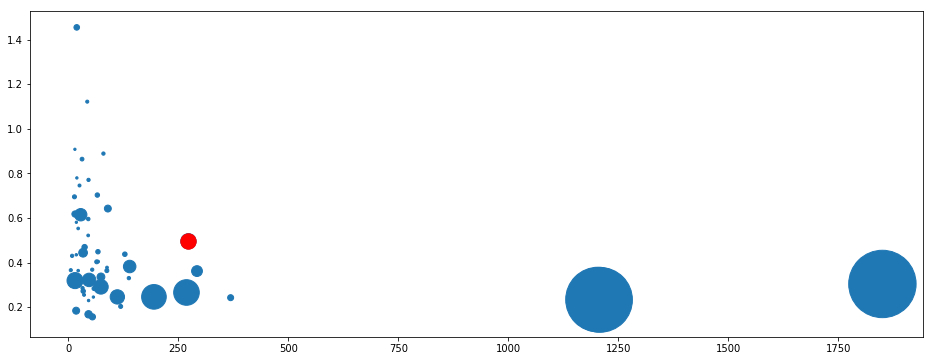

In [6]:
scale = 2e8
plt.figure(figsize=(16,6))
plt.scatter(dfp["lastClose"], dfp["av"], s=dfp["mcap"]/scale)
dft = dfp[dfp["symbol"]=="TSLA"]
plt.scatter(dft["lastClose"], dft["av"], s=dft["mcap"]/scale, c='r')

FLWS
SRCE
TWOU
JOBS
AXDX
XLRN
ACIW
ATVI
ADBE
AEIS
AMD
AERI
AVAV
AGIO
AGNC
AIMT
ATSG
AKAM
AKCA
ALRM
ALEC
ALXN
ALGN
ALKS
ALLK
ALGT
LNT
ALLO
MDRX
ALNY
GOOG
GOOGL
AABA
ALTR
AIMC
ALTM
AMRN
AMZN
AMBA
AMCX
DOX
AMED
UHAL
AMOV
AAL
AFIN
ANAT
AMWD
ABCB
AMSF
AMGN
FOLD
AMKR
ADI
ANAB
ANGI
ANSS
APLS
APOG
AINV
TSLA


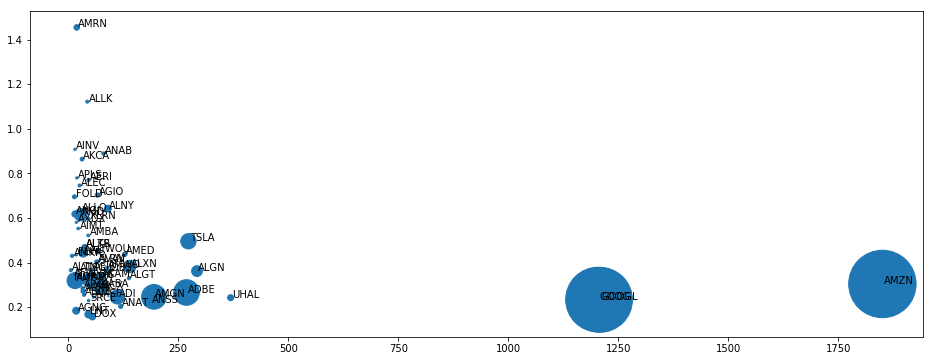

In [26]:
dfp = pd.read_csv("../code/data/nasdaq_filtered_av_mcap.csv")
dfvc = pd.read_csv("nasdaq_av_mcap.csv")

dfpf = dfp[dfp["mcap"] <= 1e13].copy()
plt.figure(figsize=(16,6))
plt.scatter(dfpf["lastClose"], dfpf["av"], s=dfpf["mcap"]/scale)
for i in range(len(dfpf)):
    plt.text(dfpf.iloc[i]["lastClose"]+3, dfpf.iloc[i]["av"], s=dfpf.iloc[i]["symbol"])
    print(dfpf.iloc[i]["symbol"])

In [10]:
len(dfvc)

178

In [11]:
dfs = df.copy()
dfs = dfs[["date", "close"]]

for i in range(len(dfs)):
    if i != 0:
        current_price = dfs.iloc[i]["close"]
        previous_price = dfs.iloc[i-1]["close"]
        dfs.at[i, "change"] = (current_price - previous_price) / previous_price #* 100
dfs = dfs[1:]
dfs

,date,close,change
1,2010-06-30,23.83,-0.002512
2,2010-07-01,21.96,-0.078473
3,2010-07-02,19.20,-0.125683
4,2010-07-06,16.11,-0.160938
5,2010-07-07,15.80,-0.019243
6,2010-07-08,17.46,0.105063
7,2010-07-09,17.40,-0.003436
8,2010-07-12,17.05,-0.020115
9,2010-07-13,18.14,0.063930
10,2010-07-14,19.84,0.093716


In [13]:
np.std(dfs["change"]) * np.sqrt(252)

0.5047924655943101

### Get stock data

In [2]:
def get_company_data(symbol, date_from, date_to):
    url = "https://www.worldtradingdata.com/api/v1/history?symbol="+symbol+"&date_from="+date_from+"&date_to="+date_to+"&sort=newest&api_token=QEs5LtpeTsF7xv85aMmBv5FFl0mQ9BaK3nPZ9ABns4HptPonyZTnoflQfeKy"
    r = requests.get(url)
    if "Message" not in r.json():
        dfs = pd.DataFrame(r.json())
        dfi = pd.DataFrame()
        for i in range(len(dfs)):
            dfi.at[i, "date"] = dfs.index[i]
            dfi.at[i, "close"] = dfs.iloc[i]["history"]["close"]
    else:
        dfi = pd.DataFrame(columns=["date", "close"])
    
    return dfi

##### List of companies

In [3]:
dfc = pd.read_csv("nasdaq_companylist.csv")
num_companies = len(dfc)
dfc.head(2)

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
0,YI,"111, Inc.",7.15,57089568.25,7984555.0,2018.0,Health Care,Medical/Nursing Services,https://www.nasdaq.com/symbol/yi,NaN
1,PIH,"1347 Property Insurance Holdings, Inc.",5.05,30364458.20,NaN,2014.0,Finance,Property-Casualty Insurers,https://www.nasdaq.com/symbol/pih,NaN


In [4]:
len(dfc)

3465

In [85]:
dfr = pd.DataFrame()
dfm = pd.DataFrame()
#dft = dfc.copy()
#dft = dft[13:]
dft = dfc[dfc["Symbol"] == "TSLA"]

for j in range(len(dft)):
    i = dft.index[j]
    print("Processing company " + str(i) + "/" + str(len(dft)))
    symbol = dft.iloc[j]["Symbol"]
    date_from="2013-04-01"
    date_to="2019-03-31"
    
    dfi = get_company_data(symbol, date_from, date_to)
    if len(dfi)>0:
        dfi["id"] = i
        dfi["symbol"] = symbol
        dfi["name"] = dft.iloc[j]["Name"]
        dfi = dfi[["id", "symbol", "name", "date", "close"]]

        dfr = dfr.append(dfi)
    else:
        dfi = pd.DataFrame()
        dfi["id"] = i
        dfi["symbol"] = symbol
        dfi["name"] = dft.iloc[j]["Name"]
        dfm = dfm.append(dfi)
        print("No stock data")

    if j%100==0 and j!=0:
        dfr.to_csv("nasdaq_all_stock_data.csv", index=False, mode="a", header=False)
        dfr = pd.DataFrame()

Processing company 3012/1
